In [76]:
import numpy as np
import pandas as pd

In [77]:
df = pd.read_csv('placement.csv')

In [78]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [80]:
df.shape

(100, 4)

In [81]:
df = df.iloc[:,1:]

In [82]:
df.shape

(100, 3)

In [83]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [84]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [85]:
import matplotlib.pyplot as plt

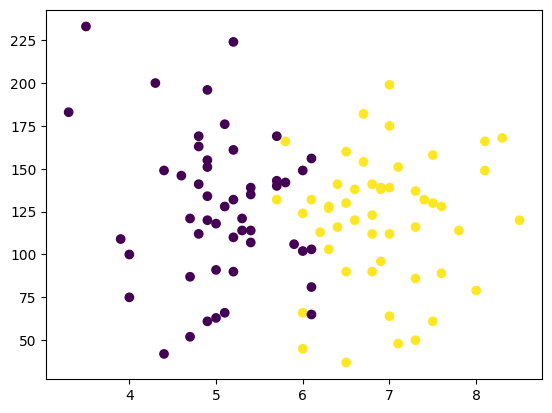

In [86]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [87]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [88]:
X.shape

(100, 2)

In [89]:
y.shape

(100,)

In [90]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [92]:
X_train

,cgpa,iq
7,5.0,63.0
72,7.3,116.0
58,8.0,79.0
57,6.5,130.0
96,4.4,42.0
...,...,...
52,7.0,175.0
16,5.2,224.0
13,6.4,116.0
77,7.3,50.0


In [93]:
y_train

7     0
72    1
58    1
57    1
96    0
     ..
52    1
16    0
13    1
77    1
63    1
Name: placement, Length: 90, dtype: int64

In [94]:
X_test

,cgpa,iq
23,4.7,87.0
70,6.3,127.0
20,6.6,120.0
0,6.8,123.0
56,6.1,65.0
55,7.8,114.0
12,5.4,139.0
54,6.4,141.0
36,5.7,140.0
24,4.7,121.0


In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()

In [98]:
X_train = scaler.fit_transform(X_train)

In [99]:
X_train

array([[-0.84853912, -1.4889457 ],
       [ 1.13393941, -0.20020119],
       [ 1.73730244, -1.09989076],
       [ 0.44438166,  0.14022189],
       [-1.36570743, -1.99958032],
       [ 0.87535525, -1.46462977],
       [-2.1414599 ,  2.64476311],
       [-1.19331799,  0.52927683],
       [ 0.78916054, -0.68651988],
       [ 0.87535525,  0.3590653 ],
       [ 0.09960279,  0.77243618],
       [-0.50376025, -0.24883306],
       [-0.84853912, -0.15156932],
       [-1.02092856,  0.40769716],
       [ 0.70296582, -0.29746493],
       [ 1.39252357,  0.09159002],
       [-0.7623444 , -1.4159979 ],
       [-0.67614968,  0.89401585],
       [ 2.16827604, -0.10293745],
       [-0.50376025,  0.26180156],
       [-1.10712328, -1.75642098],
       [-1.02092856,  0.94264772],
       [ 1.30632885, -1.53757757],
       [ 0.78916054,  0.33474936],
       [-0.24517609,  1.08854332],
       [ 1.30632885,  0.14022189],
       [ 0.44438166, -2.12115999],
       [-0.15898137,  0.4320131 ],
       [-0.7623444 ,

In [100]:
X_test = scaler.transform(X_test)

In [101]:
X_test

array([[-1.10712328, -0.90536328],
       [ 0.27199222,  0.06727408],
       [ 0.53057638, -0.10293745],
       [ 0.70296582, -0.02998965],
       [ 0.09960279, -1.44031384],
       [ 1.564913  , -0.24883306],
       [-0.50376025,  0.3590653 ],
       [ 0.35818694,  0.40769716],
       [-0.24517609,  0.38338123],
       [-1.10712328, -0.07862152]])

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
clf = LogisticRegression()

In [104]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [105]:
y_pred = clf.predict(X_test)

In [106]:
y_test

23    0
70    1
20    1
0     1
56    0
55    1
12    0
54    1
36    0
24    0
Name: placement, dtype: int64

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
accuracy_score(y_test,y_pred)

0.9

In [109]:
%pip install mlxtend
from mlxtend.plotting import plot_decision_regions

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



<Axes: >

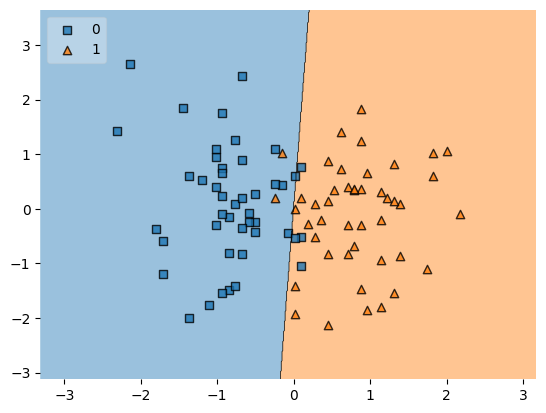

In [110]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [111]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))